![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [6]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [7]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

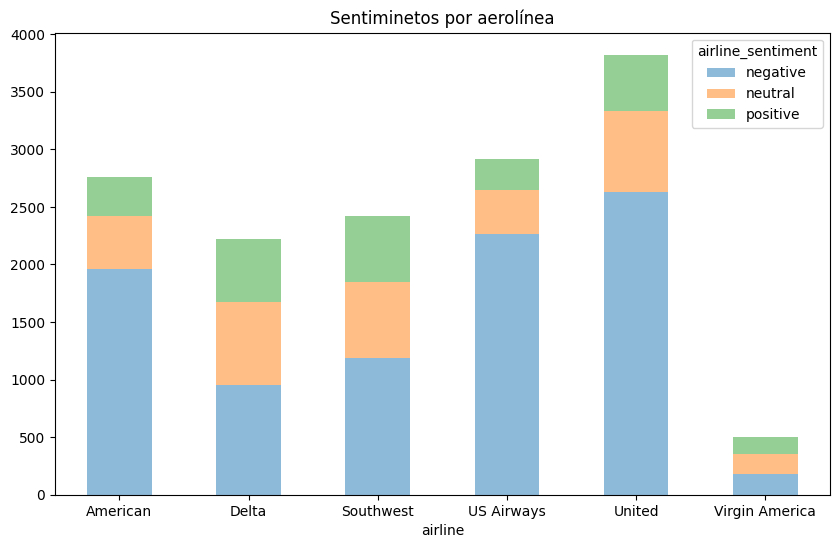

In [8]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madelgado\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1

#crear vetorizer y ajustar train y prueba
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Definimos ajustamos y predecimos con modelo de Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_vect, y_train) # ajuste 
y_pred_rf = modelo_rf.predict(X_test_vect) # preducciónes

# Calcular el accuracy para el modelo general y para el set de prueba
scores_cv = cross_val_score(modelo_rf, X_train_vect, y_train, cv=5, scoring='accuracy')
accuracy_rf = scores_cv.mean()
print(f"Accuracy RF: {accuracy_rf:.4f}")
accuracy_test = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy RF en set de prueba: {accuracy_test:.4f}")



Accuracy Random Forest: 0.7469
Accuracy en set de prueba: 0.7711


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [22]:
# Celda 2

# Crear vectorizer eliminando stopwords
vectorizer_sw = CountVectorizer(stop_words='english')
X_train_vect_sw = vectorizer_sw.fit_transform(X_train)
X_test_vect_sw = vectorizer_sw.transform(X_test)

# Definimos, ajustamos y predecimos con modelo de Random Forest
modelo_rf_sw = RandomForestClassifier(random_state=42)
modelo_rf_sw.fit(X_train_vect_sw, y_train)  # ajuste 
y_pred_rf_sw = modelo_rf_sw.predict(X_test_vect_sw)  # predicciones

# Calcular el accuracy para el modelo general y para el set de prueba
scores_cv_sw = cross_val_score(modelo_rf_sw, X_train_vect_sw, y_train, cv=5, scoring='accuracy')
accuracy_rf_sw = scores_cv_sw.mean()
print(f"Accuracy RF con eliminación de Stopwords (Cross-Validation): {accuracy_rf_sw:.4f}")

accuracy_test_sw = accuracy_score(y_test, y_pred_rf_sw)
print(f"Accuracy RF en set de prueba con eliminación de Stopwords: {accuracy_test_sw:.4f}")


Accuracy Random Forest con eliminación de Stopwords (Cross-Validation): 0.7393
Accuracy en set de prueba con eliminación de Stopwords: 0.7618


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 3

wordnet_lemmatizer = WordNetLemmatizer()

# Definición de la función de lematización para verbos
def split_into_lemmas_verbs(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

# CountVectorizer con textos lemantizados por verbo
vectorizer_lemma = CountVectorizer(analyzer=split_into_lemmas_verbs)

# Ajustar train y transformar test
X_train_vect_lemma = vectorizer_lemma.fit_transform(X_train)
X_test_vect_lemma = vectorizer_lemma.transform(X_test)

# Definir, ajustar y predecir con modelo de Random Forest
modelo_rf_lemma = RandomForestClassifier(random_state=42)
modelo_rf_lemma.fit(X_train_vect_lemma, y_train)  # ajuste 
y_pred_rf_lemma = modelo_rf_lemma.predict(X_test_vect_lemma)  # predicciones

# Calcular el accuracy para el modelo general y para el set de prueba
scores_cv_lemma = cross_val_score(modelo_rf_lemma, X_train_vect_lemma, y_train, cv=5, scoring='accuracy')
accuracy_rf_lemma = scores_cv_lemma.mean()
print(f"Accuracy Random Forest con lematización (Cross-Validation): {accuracy_rf_lemma:.4f}")
accuracy_test_lemma = accuracy_score(y_test, y_pred_rf_lemma)
print(f"Accuracy en set de prueba con lematización: {accuracy_test_lemma:.4f}")


Accuracy Random Forest con lematización (Cross-Validation): 0.7350
Accuracy en set de prueba con lematización: 0.7612


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [26]:
# Celda 4

# Definición de la función de lematización para verbos
def split_into_lemmas_verbs(text):
    text = text.lower()
    words = text.split()    
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

# Crear CountVectorizer eliminando stopwords y usando lematización
vectorizer_sw_lemma = CountVectorizer(
    stop_words='english',
    analyzer=split_into_lemmas_verbs
)

# Ajustar train y transformar test
X_train_vect_sw_lemma = vectorizer_sw_lemma.fit_transform(X_train)
X_test_vect_sw_lemma = vectorizer_sw_lemma.transform(X_test)

# Definir, ajustar y predecir con modelo de Random Forest
modelo_rf_sw_lemma = RandomForestClassifier(random_state=42)
modelo_rf_sw_lemma.fit(X_train_vect_sw_lemma, y_train)  # ajuste 
y_pred_rf_sw_lemma = modelo_rf_sw_lemma.predict(X_test_vect_sw_lemma)  # predicciones

# Calcular el accuracy para el modelo general y para el set de prueba
scores_cv_sw_lemma = cross_val_score(modelo_rf_sw_lemma, X_train_vect_sw_lemma, y_train, cv=5, scoring='accuracy')
accuracy_rf_sw_lemma = scores_cv_sw_lemma.mean()
print(f"Accuracy RF con Stopwords eliminadas + Lematización (Cross-Validation): {accuracy_rf_sw_lemma:.4f}")
accuracy_test_sw_lemma = accuracy_score(y_test, y_pred_rf_sw_lemma)
print(f"Accuracy RF en set de prueba con Stopwords eliminadas + Lematización: {accuracy_test_sw_lemma:.4f}")


Accuracy RF con Stopwords eliminadas + Lematización (Cross-Validation): 0.7350
Accuracy RF en set de prueba con Stopwords eliminadas + Lematización: 0.7612


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 5

resultados = pd.DataFrame({
    'Modelo': [
        'Random Forest básico',
        'RF con Stopwords eliminadas',
        'RF con Lematización de verbos',
        'RF con Stopwords eliminadas + Lematización'
    ],
    'Accuracy CV (Entrenamiento)': [
        accuracy_rf,
        accuracy_rf_sw,
        accuracy_rf_lemma,
        accuracy_rf_sw_lemma
    ],
    'Accuracy Test (Prueba)': [
        accuracy_test,
        accuracy_test_sw,
        accuracy_test_lemma,
        accuracy_test_sw_lemma
    ]
})

# Mostrar resultados
print(resultados)



                                       Modelo  Accuracy CV (Entrenamiento)  \
0                        Random Forest básico                     0.746940   
1                 RF con Stopwords eliminadas                     0.739295   
2               RF con Lematización de verbos                     0.735011   
3  RF con Stopwords eliminadas + Lematización                     0.735011   

   Accuracy Test (Prueba)  
0                0.771109  
1                0.761796  
2                0.761175  
3                0.761175  


Al comparar los resultados obtenidos de los diferentes modelos de Random Forest, se observa que el modelo básico (sin eliminación de stopwords ni lematización) alcanzó el mayor desempeño en el conjunto de prueba, con un accuracy de aproximadamente 77%. Los modelos que aplicaron técnicas de preprocesamiento, como eliminación de stopwords o lematización de verbos, presentaron un desempeño levemente inferior, con accuracies cercanos al 76%.

Esperabamos que con la lematizacón y eliminación de stopword el rendimiento mejorara, sin embargo no fué así, esto puede estar relacionado con que el Random Forest básico tiene la ventaja de conservar toda la información textual disponible, permitiendo al modelo capturar patrones relevantes directamente a partir de las palabras presentes. 

Por otro lado, el modelo con menor desempeño (Random Forest con lematización de verbos y eliminación de stopwords) muestra como ventaja una reducción en la complejidad del espacio vectorial, ya que elimina palabras irrelevantes y normaliza variaciones verbales. No obstante, la simplificación puede haber llevado a una pérdida de matices importantes en los textos, lo cual afectó ligeramente su capacidad predictiva.

En general, los resultados indican que en este dataset específico, la robustez del modelo Random Forest permite un buen desempeño incluso sin un preprocesamiento intensivo.